# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
"""
Your code here
"""
cut_rule = [-np.inf,0,2,5,np.inf]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, labels = ['0','1-2','3-5','5-'], include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0      215371
1-2     87868
3-5      4230
5-         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [5]:
app_train[['CNT_CHILDREN_GROUP','CNT_CHILDREN']].groupby(by=['CNT_CHILDREN_GROUP','CNT_CHILDREN']).size()

CNT_CHILDREN_GROUP  CNT_CHILDREN
0                   0               215371
1-2                 1                61119
                    2                26749
3-5                 3                 3717
                    4                  429
                    5                   84
5-                  6                   21
                    7                    7
                    8                    2
                    9                    2
                    10                   2
                    11                   1
                    12                   2
                    14                   3
                    19                   2
dtype: int64

In [6]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP','TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0                   0         166747.010980
                    1         160804.210548
1-2                 0         174590.584401
                    1         176115.362720
3-5                 0         175053.742913
                    1         160677.385714
5-                  0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

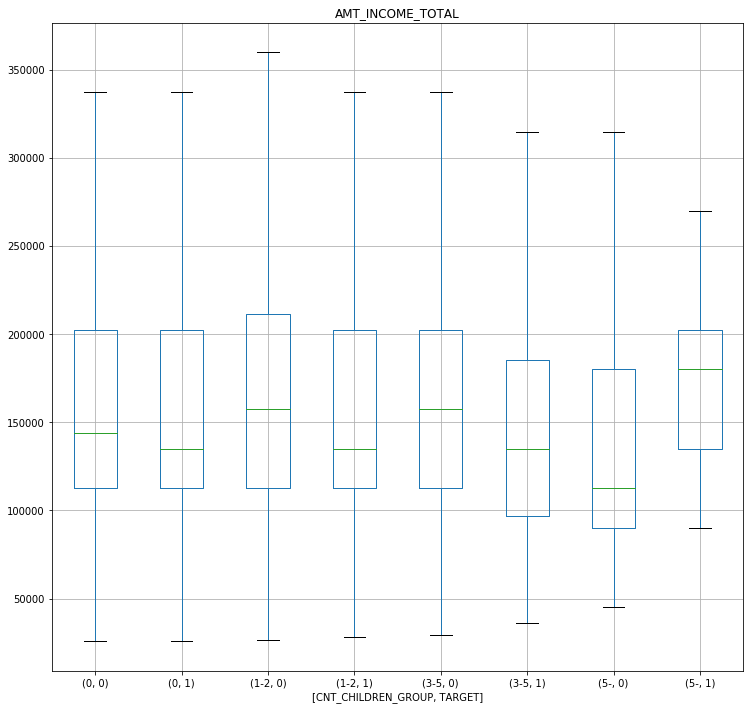

In [7]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP','TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [8]:
#3
"""
Your code here
"""

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


In [11]:
grouped_df.describe()

count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
0                  0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
1-2                0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
3-5                0         3810.0  175053.742913  1.128427e+05  29250.0   
                   1          420.0  160677.385714  1.130315e+05  36000.0   
5-                 0           33.0  139159.090909  7.112483e+04  45000.0   
                   1            9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
0                  0       112500.0  144000.0  202500.0   13500000.0  
                   1       112500.0  135000.0  202500.0    1890000.0  
1-2                0       112500.0  157500.0  211500.0   18000090.0  
                   1       112500.0  135000.0  202500.0  117000000.0  
3-5                0       112500.0  157500.0  202500.0    2250000.0  
                   1        96750.0  135000.0  185625.0    1350000.0  
5-                 0        90000.0  112500.0  180000.0     337500.0  
                   1       135000.0  180000.0  202500.0     315000.0

In [12]:
app_train.groupby(grp)['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'].describe()

count          mean  std       min       25%  \
CNT_CHILDREN_GROUP TARGET                                                    
0                  0       198762.0  8.176642e-16  1.0 -1.328848 -0.510897   
                   1        16609.0  1.457322e-16  1.0 -1.593234 -0.569423   
1-2                0        80081.0 -6.294281e-17  1.0 -1.231638 -0.516569   
                   1         7787.0 -9.414690e-17  1.0 -0.111679 -0.047934   
3-5                0         3810.0 -1.727985e-17  1.0 -1.292097 -0.554345   
                   1          420.0 -1.982541e-17  1.0 -1.103033 -0.565572   
5-                 0           33.0  4.541821e-17  1.0 -1.323857 -0.691166   
                   1            9.0  0.000000e+00  1.0 -1.219989 -0.609994   

                                50%       75%         max  
CNT_CHILDREN_GROUP TARGET                                  
0                  0      -0.214231  0.336721  125.572276  
                   1      -0.304187  0.491521   20.384223  
1-2                0      -0.142187  0.307071  148.300953  
                   1      -0.030980  0.019881   88.025560  
3-5                0      -0.155559  0.243226   18.387953  
                   1      -0.227170  0.220714   10.522050  
5-                 0      -0.374821  0.574215    2.788631  
                   1       0.000000  0.304997    1.829983